# Mount Google Drive to access dataset


In [1]:
# Mount Google drive to access dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/42028/ASSESSMENT_1_A/Train_Test_Folder

/content/gdrive/MyDrive/42028/ASSESSMENT_1_A/Train_Test_Folder


# Import required packages

In [3]:
# Import necessary packages
import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import svm # This pacakge is used for svm classification
from sklearn import metrics
%matplotlib inline
import cv2
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)
# import the packages required 
  
 
from IPython.display import display, HTML, clear_output
## Import the required packages ##
import math, numpy as np
import sklearn.datasets
import os
import h5py
import glob
import keras.utils as image
import tensorflow as tf

%load_ext tensorboard
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)


2.11.0
2.11.0


# Helper function to load dataset

In [4]:
def loadDataset():

  ## Read all the train and test images, flatten them and change them to grayscale for training and testing
  train_path   = "./train"
  test_path    = "./test"
  train_labels = os.listdir(train_path)
  test_labels  = os.listdir(test_path) 

  image_size       = (45, 45)
  num_train_images = 3500
  num_test_images  = 1500

  train_x = np.zeros(((image_size[0]*image_size[1]), num_train_images))
  train_y = np.zeros((1, num_train_images))
  test_x  = np.zeros(((image_size[0]*image_size[1]), num_test_images))
  test_y  = np.zeros((1, num_test_images))

  #----------------
  # TRAIN dataset
  #----------------
  count = 0
  num_label = 0
  for i, label in enumerate(train_labels):
    cur_path = train_path + "/" + label
    print(glob.glob(cur_path + "/*.jpg"))
    for image_path in glob.glob(cur_path + "/*.jpg"):
      img = cv2.imread(image_path)
      # Change from color to grayscale
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      #print(image_path)
      x   = np.asarray(img)
      x   = x.flatten()
      x   = np.expand_dims(x, axis=0)
      train_x[:,count] = x
      train_y[:,count] = num_label
      count += 1
    num_label += 1

  #--------------
  # TEST dataset
  #--------------
  count = 0 
  num_label = 0 
  for i, label in enumerate(test_labels):
    cur_path = test_path + "/" + label
    for image_path in glob.glob(cur_path + "/*.jpg"):
      img = cv2.imread(image_path)
      # Change from color to grayscale
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      x   = np.asarray(img)
      x   = x.flatten()
      x   = np.expand_dims(x, axis=0)
      test_x[:,count] = x
      test_y[:,count] = num_label
      count += 1
    num_label += 1

  #------------------
  # standardization
  #------------------
  train_x = train_x/255.
  test_x  = test_x/255.


  ## Print the statistics of the data
  print ("train_labels : " + str(train_labels))
  print ("train_x shape: " + str(train_x.shape))
  print ("train_y shape: " + str(train_y.shape))
  print ("test_x shape : " + str(test_x.shape))
  print ("test_y shape : " + str(test_y.shape))

  return train_x, train_y, test_x, test_y

# SVM

In [5]:
# Load the dataset

In [6]:
X_train, y_train, X_test, y_test = loadDataset()

['./train/!/exp22012.jpg', './train/!/exp10309.jpg', './train/!/exp23386.jpg', './train/!/exp21731.jpg', './train/!/!_15475.jpg', './train/!/exp11407.jpg', './train/!/exp28682.jpg', './train/!/exp101071.jpg', './train/!/!_95964.jpg', './train/!/exp16347.jpg', './train/!/exp24677.jpg', './train/!/exp13461.jpg', './train/!/!_25845.jpg', './train/!/exp13456.jpg', './train/!/exp81442.jpg', './train/!/exp100213.jpg', './train/!/exp89445.jpg', './train/!/!_14337.jpg', './train/!/exp17420.jpg', './train/!/exp20594.jpg', './train/!/exp11401.jpg', './train/!/!_12590.jpg', './train/!/!_95970.jpg', './train/!/exp21739.jpg', './train/!/exp9755.jpg', './train/!/exp10843.jpg', './train/!/exp22084.jpg', './train/!/exp26429.jpg', './train/!/exp9967.jpg', './train/!/!_9086.jpg', './train/!/exp9745.jpg', './train/!/exp22342.jpg', './train/!/exp12774.jpg', './train/!/exp84995.jpg', './train/!/!_25553.jpg', './train/!/exp11043.jpg', './train/!/exp12011.jpg', './train/!/exp22623.jpg', './train/!/exp97390.j

In [7]:
# Check the shape of training and test samples

In [8]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(2025, 3500)
(2025, 1500)
(1, 3500)
(1, 1500)


In [9]:
# Transpose them

In [10]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [11]:
# Check the shape of training and test samples

In [12]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(3500, 2025)
(1500, 2025)
(3500, 1)
(1500, 1)


In [13]:
# Make the labels a one dimensional vector
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [14]:
# Check the shape of training and test samples
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(3500, 2025)
(1500, 2025)
(3500,)
(1500,)


In [15]:
# train a SVM clasifier on the training data
# Initialize the SVM model
model = svm.SVC(kernel='rbf',C=100.0, random_state=42) # rbf Kernel
# Start training the SVM classifier 
model.fit(X_train, y_train)

SVC(C=100.0, random_state=42)

In [16]:
print("Train set Accuracy: {:.2f}".format(model.score(X_train,y_train)))

Train set Accuracy: 1.00


In [17]:
#Predict on test samples
y_pred = model.predict(X_test)

In [18]:
np.shape(y_pred)

(1500,)

In [19]:
# Test set Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.9773333333333334


[[150   0   0   0   0   0   0   0   0   0]
 [  0 150   0   0   0   0   0   0   0   0]
 [  4   1 145   0   0   0   0   0   0   0]
 [  0   0   0 142   4   0   2   0   2   0]
 [  0   0   0   3 146   0   0   1   0   0]
 [  0   0   0   0   0 150   0   0   0   0]
 [  0   0   0   1   0   2 145   0   2   0]
 [  0   0   1   0   0   0   0 149   0   0]
 [  0   0   0   0   5   0   5   0 140   0]
 [  0   0   0   0   0   0   1   0   0 149]]


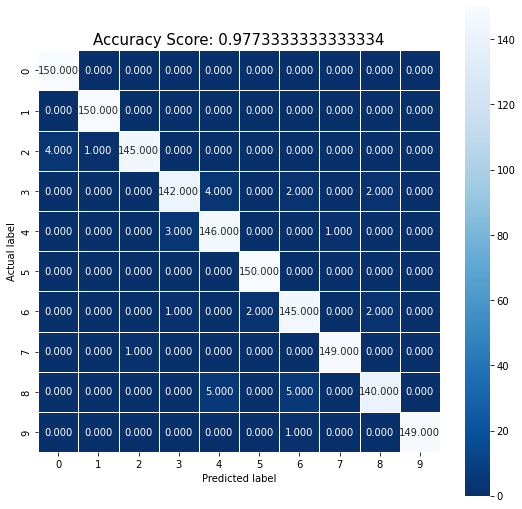

In [20]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

# ANN

In [21]:
# Load the dataset
X_train, y_train, X_test, y_test = loadDataset()

['./train/!/exp22012.jpg', './train/!/exp10309.jpg', './train/!/exp23386.jpg', './train/!/exp21731.jpg', './train/!/!_15475.jpg', './train/!/exp11407.jpg', './train/!/exp28682.jpg', './train/!/exp101071.jpg', './train/!/!_95964.jpg', './train/!/exp16347.jpg', './train/!/exp24677.jpg', './train/!/exp13461.jpg', './train/!/!_25845.jpg', './train/!/exp13456.jpg', './train/!/exp81442.jpg', './train/!/exp100213.jpg', './train/!/exp89445.jpg', './train/!/!_14337.jpg', './train/!/exp17420.jpg', './train/!/exp20594.jpg', './train/!/exp11401.jpg', './train/!/!_12590.jpg', './train/!/!_95970.jpg', './train/!/exp21739.jpg', './train/!/exp9755.jpg', './train/!/exp10843.jpg', './train/!/exp22084.jpg', './train/!/exp26429.jpg', './train/!/exp9967.jpg', './train/!/!_9086.jpg', './train/!/exp9745.jpg', './train/!/exp22342.jpg', './train/!/exp12774.jpg', './train/!/exp84995.jpg', './train/!/!_25553.jpg', './train/!/exp11043.jpg', './train/!/exp12011.jpg', './train/!/exp22623.jpg', './train/!/exp97390.j

In [22]:
# Transpose training and test samples
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [23]:
# Check the shape of training and test samples
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(3500, 2025)
(1500, 2025)
(3500, 1)
(1500, 1)


In [24]:
# Reshape training and test samples before feeding them to the model
X_train=X_train.reshape(-1,45,45)
X_test=X_test.reshape(-1,45,45)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(3500, 45, 45)
Test dataset after reshaping :(1500, 45, 45)


In [25]:
# Design a sequential model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[45,45]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [26]:
# Train the model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
110/110 [==============================] - 2s 13ms/step - loss: 2.3714 - accuracy: 0.1377 - val_loss: 2.2290 - val_accuracy: 0.1893
Epoch 2/10
110/110 [==============================] - 1s 10ms/step - loss: 2.1592 - accuracy: 0.2214 - val_loss: 2.0743 - val_accuracy: 0.3267
Epoch 3/10
110/110 [==============================] - 1s 12ms/step - loss: 1.9945 - accuracy: 0.3400 - val_loss: 1.9092 - val_accuracy: 0.4007
Epoch 4/10
110/110 [==============================] - 1s 10ms/step - loss: 1.8424 - accuracy: 0.4046 - val_loss: 1.7500 - val_accuracy: 0.5660
Epoch 5/10
110/110 [==============================] - 1s 7ms/step - loss: 1.6857 - accuracy: 0.4786 - val_loss: 1.6115 - val_accuracy: 0.5327
Epoch 6/10
110/110 [==============================] - 1s 7ms/step - loss: 1.5313 - accuracy: 0.5594 - val_loss: 1.4757 - val_accuracy: 0.6433
Epoch 7/10
110/110 [==============================] - 1s 7ms/step - loss: 1.4123 - accuracy: 0.5763 - val_loss: 1.3659 - val_accuracy: 0.6767
Ep

Accuracy on test dataset: 0.8087